In [16]:
import glob,os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from time import time
from sys import argv

#most efficient way to segment according to https://towardsdatascience.com/efficiently-splitting-an-image-into-tiles-in-python-using-numpy-d1bf0dd7b6f7

os.chdir("/Users/domchom/Desktop/Python_Learning/image_segment/single_frames") # the pathname that contains the folders of interest

def _time(f):
    def wrapper(*args):
        start = time()
        r = f(*args)
        end = time()
        print("%s timed %f" % (f.__name__, end-start) )
        return r
    return wrapper

def reshape_split(image: np.ndarray, kernel_size: tuple):

    img_height, img_width, channels = image.shape
    tile_height, tile_width = kernel_size

    tiled_array = image.reshape(img_height // tile_height, # // is division, rounded down
                                tile_height,
                                img_width // tile_width,
                                tile_width,
                                channels)
    tiled_array = tiled_array.swapaxes(1, 2)
    return tiled_array

img = np.asarray(Image.open('test.tiff'))

t1, t2 = (8, 8)
tilesize = (int(t1), int(t2))

tiles = reshape_split(img, tilesize)

for one_row in tiles[0][0][0]: # this is at the one tile level
    print(one_row)

[41 41 41]
[42 42 42]
[43 43 43]
[41 41 41]
[41 41 41]
[40 40 40]
[40 40 40]
[40 40 40]


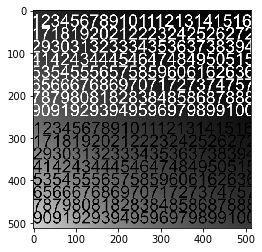

In [17]:
#just showing the image that I am working with

plt.imshow(img, interpolation='nearest')
plt.show()

{0: 85.734375, 1: 99.359375, 2: 95.5625, 3: 70.609375, 4: 70.078125, 5: 55.84375, 6: 84.796875, 7: 62.40625, 8: 96.953125, 9: 166.625, 10: 68.0, 11: 115.75, 12: 80.03125, 13: 95.453125, 14: 156.828125, 15: 114.546875, 16: 205.78125, 17: 157.640625, 18: 123.59375, 19: 136.171875, 20: 105.765625, 21: 154.140625, 22: 160.40625, 23: 133.140625, 24: 99.0625, 25: 82.640625, 26: 67.828125, 27: 54.8125, 28: 43.390625, 29: 33.5, 30: 25.03125, 31: 17.9375, 32: 101.109375, 33: 59.78125, 34: 30.28125, 35: 30.25, 36: 14.8125, 37: 16.671875, 38: 11.9375, 39: 12.0, 40: 59.265625, 41: 70.34375, 42: 48.296875, 43: 28.21875, 44: 34.421875, 45: 33.015625, 46: 31.515625, 47: 23.125, 48: 131.890625, 49: 104.546875, 50: 83.53125, 51: 72.21875, 52: 64.828125, 53: 53.796875, 54: 46.40625, 55: 32.03125, 56: 199.34375, 57: 174.515625, 58: 151.40625, 59: 129.921875, 60: 110.21875, 61: 93.09375, 62: 76.84375, 63: 62.890625}


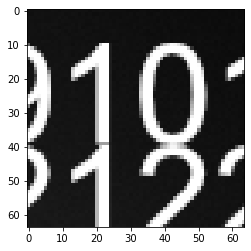

In [46]:
#different way of segmetting, that I can understand
img = np.asarray(Image.open('test.tiff'))

M = img.shape[0]//8
N = img.shape[1]//8

new_tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]

i = 0
tile_avg_pix_val = {}

for tile in new_tiles:
    for one_extra in tile: #note sure why I need to do the one extra...
        first_channel_values = [] #list of pixel values for each tiles
        for one_pixel in one_extra:
            first_channel_values.append(one_pixel[0]) #extract the first channel of the pixel (even though all channels are the same), and append to list
    mean_pix_val_of_tile = sum(first_channel_values) / len(first_channel_values) #calc the mean
    tile_avg_pix_val[i] = mean_pix_val_of_tile #append to final list
    i += 1

print(tile_avg_pix_val)

plt.imshow(new_tiles[3], interpolation='nearest')
plt.show()